In [53]:
import os
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from config import Path

In [54]:
DataPath=Path["test"]

In [55]:
train, test=tf.keras.utils.image_dataset_from_directory(directory=DataPath,seed=1,validation_split=0.1, subset="both")
data_iterator=train.as_numpy_iterator()
batch=data_iterator.next()

Found 10 files belonging to 3 classes.
Using 9 files for training.
Using 1 files for validation.


In [56]:
# batch[0]-images
# batch[1]-labels
batch[1]

array([2, 2, 0, 0, 2, 1, 0, 0, 1])

In [57]:
def face_detect(img):
    img=np.array(img,dtype="uint8")
    img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    haar_cascade=cv2.CascadeClassifier(Path["haar_face"])
    faces_rect=haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3)
    return faces_rect

(256, 256, 3)


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


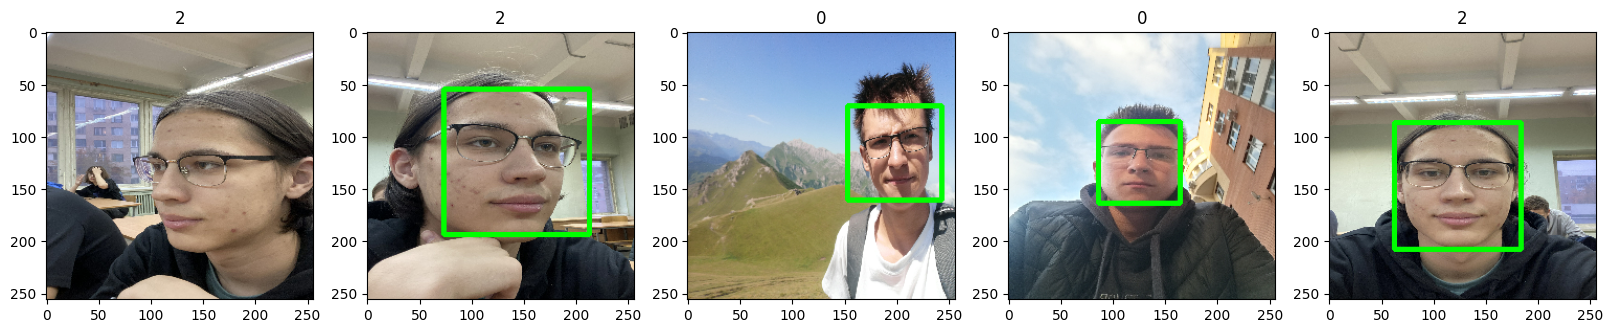

In [58]:
faces=[]
fig, ax =plt.subplots(ncols=5,figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    faces_rect=face_detect(img)
    if len(faces_rect)>0:
        cv2.rectangle(img, faces_rect[0], [0, 255, 0], 4)
        crop=img[faces_rect[0][1]:faces_rect[0][3], faces_rect[0][0]:faces_rect[0][2]]

    
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    